In [1]:
# Hard margin SVM with Linear Kernel (in 2D)
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def generate_data(m, c): # generating 2 Gaussian clusters with centers (-c,c),(c,c), cluster standard deviation 3*c/4 and total sample size m 
  center = [(-c,-c), (c,c)]
  X, y = make_blobs(n_samples = m, centers = center, cluster_std = 3*c/4, n_features = 2)
  for i in range(m): # generated y consisted of 0 and 1 values, change 0 to -1 to satisfy data distribution requirement
    if y[i] == 0:
      y[i] = -1
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
  return X_train, X_test, y_train, y_test

m_vals = np.array([10, 50, 100, 500, 1000, 5000, 10000, 50000]) #sample mean values
c_vals = np.array([2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12]) # c values for cluster means and standard
#deviations

value_matrix = np.zeros((8,21,5)) #value matrix of matrices for each sample size, containing a tuple of gamma, rho, train error and test error
for i in range(8):
  for j in range(21):
    X_train, X_test, y_train, y_test = generate_data(m_vals[i], c_vals[j])

    clf = SVC(kernel = 'linear')
    clf = clf.fit(X_train, y_train) #fitting SVC model with Linear Kernel

    value_matrix[i][j][0] = m_vals[i] #sample size
    value_matrix[i][j][1] = round(1 / np.linalg.norm(clf.coef_), 2) #gamma
    value_matrix[i][j][2] = max(np.sqrt(np.square(X_train).sum(axis=1))) #rho s.t. ||X||<=rho
    value_matrix[i][j][3] = 1 - clf.score(X_train, y_train) # training error
    value_matrix[i][j][4] = 1 - clf.score(X_test, y_test) # test error

In [2]:
#printing data
value_matrix 

array([[[1.00000000e+01, 2.08000000e+00, 5.59784303e+00, 0.00000000e+00,
         0.00000000e+00],
        [1.00000000e+01, 2.08000000e+00, 6.55009102e+00, 0.00000000e+00,
         2.50000000e-01],
        [1.00000000e+01, 4.38000000e+00, 1.19678352e+01, 0.00000000e+00,
         0.00000000e+00],
        [1.00000000e+01, 2.47000000e+00, 5.21637965e+00, 0.00000000e+00,
         2.50000000e-01],
        [1.00000000e+01, 4.68000000e+00, 1.06657578e+01, 0.00000000e+00,
         0.00000000e+00],
        [1.00000000e+01, 4.35000000e+00, 1.47776386e+01, 0.00000000e+00,
         0.00000000e+00],
        [1.00000000e+01, 6.50000000e+00, 1.84283553e+01, 0.00000000e+00,
         0.00000000e+00],
        [1.00000000e+01, 4.17000000e+00, 1.36600257e+01, 0.00000000e+00,
         0.00000000e+00],
        [1.00000000e+01, 7.19000000e+00, 1.58747412e+01, 0.00000000e+00,
         0.00000000e+00],
        [1.00000000e+01, 7.10000000e+00, 1.85962031e+01, 0.00000000e+00,
         5.00000000e-01],
        [1

In [117]:
#taking example data for sample size of 1000 data points
value_matrix[4]

array([[1.00000000e+03, 8.40000000e-01, 7.98484936e+00, 2.53731343e-02,
        3.03030303e-02],
       [1.00000000e+03, 7.90000000e-01, 9.12245668e+00, 3.13432836e-02,
        1.21212121e-02],
       [1.00000000e+03, 1.06000000e+00, 1.04126415e+01, 2.53731343e-02,
        3.33333333e-02],
       [1.00000000e+03, 1.18000000e+00, 1.35066499e+01, 2.68656716e-02,
        3.33333333e-02],
       [1.00000000e+03, 1.35000000e+00, 1.55153838e+01, 4.32835821e-02,
        2.12121212e-02],
       [1.00000000e+03, 1.12000000e+00, 1.67707515e+01, 2.38805970e-02,
        3.93939394e-02],
       [1.00000000e+03, 1.60000000e+00, 1.89254194e+01, 3.13432836e-02,
        1.51515152e-02],
       [1.00000000e+03, 2.35000000e+00, 2.17819771e+01, 3.13432836e-02,
        4.84848485e-02],
       [1.00000000e+03, 1.69000000e+00, 2.34976859e+01, 2.08955224e-02,
        5.15151515e-02],
       [1.00000000e+03, 2.68000000e+00, 2.81095082e+01, 3.73134328e-02,
        3.33333333e-02],
       [1.00000000e+03, 2.4400

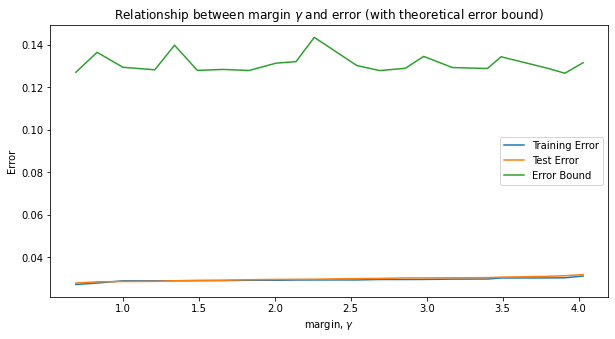

In [250]:
# Graph showing bound (margin varied, sample size fixed)

m_vals = np.array([10, 50, 100, 500, 1000, 5000, 10000, 50000])

i = 7 #chosen m[i] = 50000
m = np.sort(value_matrix[i][:], axis = 0)[:, 0]
gamma = np.sort(value_matrix[i][:], axis = 0)[:, 1]
rho = np.sort(value_matrix[i][:], axis = 0)[:, 2]
train_error = np.sort(value_matrix[i][:], axis = 0)[:, 3]
test_error = np.sort(value_matrix[i][:], axis = 0)[:, 4]
delta = 0.2 #confidence level so that error bound bounds error values by 80% confidence
bound = np.sqrt((4*(rho/gamma)**2)/m)+np.sqrt((2*np.log(2/delta))/m) #bound from Theorem

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.title('Relationship between margin $\gamma$ and error (with theoretical error bound)')
plt.xlabel('margin, $\gamma$')
plt.ylabel('Error')
plt.plot(gamma,train_error,label = 'Training Error')
plt.plot(gamma,test_error, label = 'Test Error')
plt.plot(gamma,bound, label = 'Error Bound')
plt.legend()
plt.show()

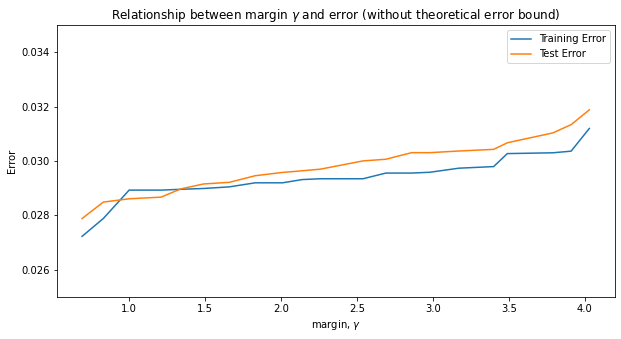

In [251]:
# Graph showing relationship error ~ gamma (margin varied, sample size fixed)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.title('Relationship between margin $\gamma$ and error (without theoretical error bound)')
plt.xlabel('margin, $\gamma$')
plt.ylabel('Error')
plt.ylim((0.025, 0.035))
plt.plot(gamma,train_error,label = 'Training Error')
plt.plot(gamma,test_error, label = 'Test Error')
plt.legend()
plt.show()

In [178]:
#printing gammas to look for gammas possible for each sample size value
for i in range(8):
  print(np.sort(value_matrix[i][:], axis = 0)[:, 1])

[ 0.95  2.08  2.08  2.47  2.98  3.03  4.17  4.35  4.38  4.68  6.37  6.5
  7.1   7.19  7.58  8.69 11.14 11.42 12.3  12.41 19.85]
[0.77 1.   1.02 1.14 1.19 1.19 1.96 2.07 2.07 2.32 2.67 3.03 3.47 3.64
 3.77 3.84 3.91 4.32 4.5  4.53 6.04]
[0.59 0.66 0.82 1.01 1.05 1.06 1.08 1.15 1.22 1.25 1.61 1.62 1.74 1.83
 1.87 1.93 2.86 3.33 3.41 3.58 4.5 ]
[0.67 0.74 1.05 1.33 1.43 1.52 1.54 1.85 1.93 1.93 2.24 2.75 2.9  2.97
 3.   3.32 3.32 3.66 4.04 4.6  4.75]
[0.79 0.84 1.06 1.12 1.18 1.35 1.6  1.69 2.35 2.38 2.44 2.59 2.68 2.73
 2.84 2.9  2.98 2.99 3.1  3.61 4.31]
[0.62 0.81 1.05 1.25 1.42 1.46 1.69 1.75 2.04 2.11 2.22 2.45 2.67 2.81
 3.08 3.25 3.27 3.67 3.69 3.92 4.01]
[0.69 0.86 1.03 1.19 1.3  1.63 1.66 1.83 1.84 2.24 2.32 2.46 2.66 2.87
 3.   3.02 3.07 3.53 3.56 3.9  3.98]
[0.69 0.83 1.   1.21 1.34 1.49 1.66 1.83 2.01 2.14 2.26 2.54 2.69 2.86
 2.98 3.17 3.4  3.49 3.79 3.91 4.03]


In [179]:
# Chose gammas closest to 3, so searching for indexes of entries in data matrix having gamma close to 3

indexes = np.zeros(8)
for i in range(8):
  diff = 3
  for j in range(21):
    if abs(np.sort(value_matrix[i][:], axis = 0)[:, 1][j] - 3) < diff:
      indexes[i] = int(j)
      diff = abs(np.sort(value_matrix[i][:], axis = 0)[:, 1][j] - 3)

indexes 

array([ 4., 11., 16., 14., 17., 14., 14., 14.])

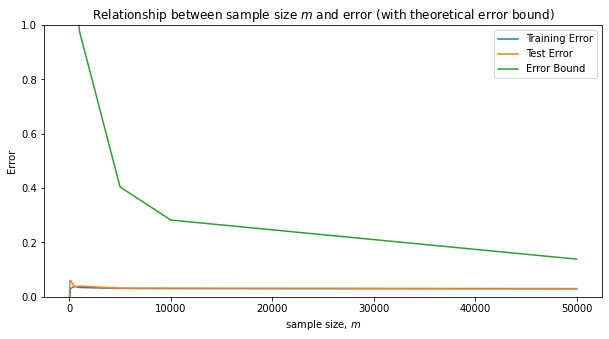

In [252]:
# Graph showing bound (sample size varied, gamma fixed)

train_error_m = np.zeros(8)
test_error_m = np.zeros(8)
gamma_m = np.zeros(8)
rho_m = np.zeros(8)

m = m_vals
for i in range(8):
  train_error_m[i] = np.sort(value_matrix[i][:], axis = 0)[:, 3][int(indexes[i])]
  test_error_m[i] = np.sort(value_matrix[i][:], axis = 0)[:, 4][int(indexes[i])]
  gamma_m[i] = np.sort(value_matrix[i][:], axis = 0)[:, 1][int(indexes[i])]
  rho_m[i] = np.sort(value_matrix[i][:], axis = 0)[:, 2][int(indexes[i])]

delta = 0.02
bound_m = np.sqrt((4*(rho_m/gamma_m)**2)/m)+np.sqrt((2*np.log(2/delta))/m) 

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.title('Relationship between sample size $m$ and error (with theoretical error bound)')
plt.xlabel('sample size, $m$')
plt.ylabel('Error')
plt.ylim((0, 1)) # was 0 to 0.7
plt.plot(m, train_error_m, label = 'Training Error')
plt.plot(m, test_error_m, label = 'Test Error')
plt.plot(m, bound_m, label = 'Error Bound')
plt.legend()
plt.show()

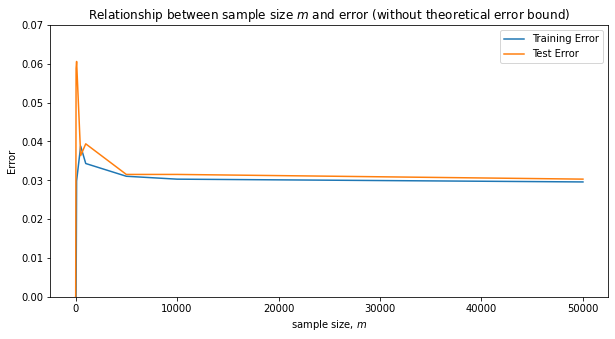

In [254]:
# Graph showing relationship error ~ 1/m (sample size varied, gamma fixed)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.title('Relationship between sample size $m$ and error (without theoretical error bound)')
plt.xlabel('sample size, $m$')
plt.ylabel('Error')
plt.ylim((0, 0.07))
plt.plot(m, train_error_m, label = 'Training Error')
plt.plot(m, test_error_m, label = 'Test Error')
plt.legend()
plt.show()

# **Real dataset**

In [416]:
# importing dataset
df = pd.read_csv('https://raw.githubusercontent.com/oshortanbaiuly/AigerimKalizhanova_OlzhasShortanbaiuly_MATH540_Project/main/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [417]:
df.shape

(1599, 12)

In [470]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [378]:
#Creating y with values in {+1, -1}
df['Class'] = np.zeros(227,)
for i in range(227):
  if df['Literacy (%)'][i] >= 90:
    df['Class'][i] = 1
  else:
    df['Class'][i] = -1

df["Class"].unique()

<ipython-input-378-2623736f22e0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'][i] = -1
<ipython-input-378-2623736f22e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'][i] = 1


array([-1.,  1.])

In [445]:
# generating data samples with different sample sizes and margins (varying margins is obtained through changing random states for randomly 
# generated samples

def generate_data_from_real(m, rs):
  df_gen = np.random.random_sample(df, m)
  X = np.array(df[['fixed acidity', 'total sulfur dioxide']])
  y = np.array(df[["Class"]]).reshape((227,))

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = rs)
  return X_train, X_test, y_train, y_test


m_vals_r = np.array([10, 50, 100, 500, 1000, 1599]) # sample sizes
rs_vals = np.arange(1, 22, 1) # random states

value_matrix_r = np.zeros((6,21,5))
for i in range(6):
  for j in range(21):
    X_train, X_test, y_train, y_test = generate_data(m_vals_r[i], rs_vals[j])

    clf_r = SVC(kernel = 'linear')
    clf_r = clf_r.fit(X_train, y_train)

    value_matrix_r[i][j][0] = m_vals[i] #sample size
    value_matrix_r[i][j][1] = round(1 / np.linalg.norm(clf_r.coef_), 2) #margin gamma
    value_matrix_r[i][j][2] = max(np.sqrt(np.square(X_train).sum(axis=1))) #rho with ||X||<=1
    value_matrix_r[i][j][3] = 1 - clf_r.score(X_train, y_train) # training error
    value_matrix_r[i][j][4] = 1 - clf_r.score(X_test, y_test) # test error

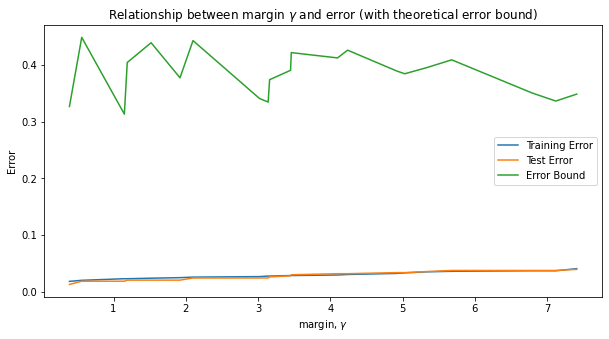

In [464]:
# Graph showing bound (sample size fixed, margin varied)

import matplotlib.pyplot as plt

i = 5 #chosen m[i] = 1599
m_r = np.sort(value_matrix_r[i][:], axis = 0)[:, 0]
gamma_r = np.sort(value_matrix_r[i][:], axis = 0)[:, 1]
rho_r = np.sort(value_matrix_r[i][:], axis = 0)[:, 2]
train_error_r = np.sort(value_matrix_r[i][:], axis = 0)[:, 3]
test_error_r = np.sort(value_matrix_r[i][:], axis = 0)[:, 4]
delta = 0.2 #confidence level so that error bound bounds error values by 80% confidence
bound_r = np.sqrt((4*(rho_r/gamma_r)**2)/m_r)+np.sqrt((2*np.log(2/delta))/m_r) #Error bound

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.title('Relationship between margin $\gamma$ and error (with theoretical error bound)')
plt.xlabel('margin, $\gamma$')
plt.ylabel('Error')
plt.plot(gamma_r,train_error_r, label = 'Training Error')
plt.plot(gamma_r,test_error_r, label = 'Test Error')
plt.plot(gamma_r,bound_r, label = 'Error Bound')
plt.legend()
plt.show()

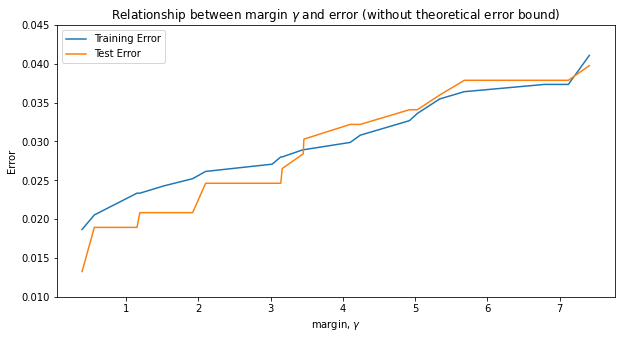

In [465]:
# Graph showing relationship error ~ gamma (sample size fixed, margin varied)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.title('Relationship between margin $\gamma$ and error (without theoretical error bound)')
plt.xlabel('margin, $\gamma$')
plt.ylabel('Error')
plt.ylim((0.01, 0.045))
plt.plot(gamma_r,train_error_r, label = 'Training Error')
plt.plot(gamma_r,test_error_r, label = 'Test Error')
plt.legend()
plt.show()

In [466]:
#printing gammas to look for gammas possible for each sample size value
for i in range(5):
  print(np.sort(value_matrix_r[i][:], axis = 0)[:, 1])

[ 0.91  1.06  1.29  2.04  2.42  3.25  4.48  4.55  6.49  7.96  9.2   9.4
 13.21 13.34 13.84 14.98 18.66 18.74 24.5  30.48 32.26]
[0.71 0.85 0.95 1.06 1.07 1.36 1.67 1.71 1.73 1.75 1.75 2.03 2.54 2.63
 3.54 4.01 4.87 5.04 5.28 6.16 8.47]
[0.48 0.8  0.85 0.89 0.95 1.11 1.49 1.54 1.93 1.94 1.99 2.13 2.54 2.73
 2.76 3.06 4.28 4.54 5.1  5.83 8.11]
[0.38 0.71 0.75 1.53 1.91 2.13 2.56 2.6  2.72 2.73 3.42 3.49 3.76 4.35
 4.53 5.91 5.98 6.46 6.61 6.69 8.57]
[0.42 0.74 0.95 1.27 1.8  2.   2.45 2.49 2.76 3.23 3.32 3.37 4.74 4.87
 5.14 5.34 5.4  6.   6.68 6.69 7.4 ]


In [467]:
# Chose gammas closest to 5

indexes_r = np.zeros(6)
for i in range(6):
  diff_r = 5
  for j in range(21):
    if abs(np.sort(value_matrix_r[i][:], axis = 0)[:, 1][j] - 5) < diff_r:
      indexes_r[i] = int(j)
      diff_r = abs(np.sort(value_matrix_r[i][:], axis = 0)[:, 1][j] - 5)

indexes_r

array([ 7., 17., 18., 14., 13., 15.])

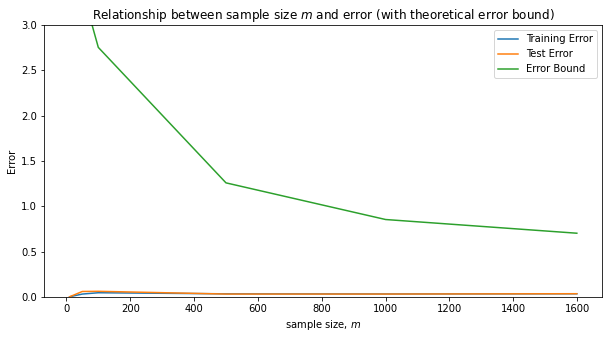

In [468]:
# Graph showing bound (gamma fixed, sample size varied)

train_error_m_r = np.zeros(6)
test_error_m_r = np.zeros(6)
gamma_m_r = np.zeros(6)
rho_m_r = np.zeros(6)

m_r = np.array([10, 50, 100, 500, 1000, 1599])
for i in range(6):
  train_error_m_r[i] = np.sort(value_matrix_r[i][:], axis = 0)[:, 3][int(indexes_r[i])]
  test_error_m_r[i] = np.sort(value_matrix_r[i][:], axis = 0)[:, 4][int(indexes_r[i])]
  gamma_m_r[i] = np.sort(value_matrix_r[i][:], axis = 0)[:, 1][int(indexes_r[i])]
  rho_m_r[i] = np.sort(value_matrix_r[i][:], axis = 0)[:, 2][int(indexes_r[i])]

delta = 0.02
bound_m_r = np.sqrt((4*(rho_m_r/gamma_m_r)**2)/m_r)+np.sqrt((2*np.log(2/delta))/m_r) 

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.title('Relationship between sample size $m$ and error (with theoretical error bound)')
plt.xlabel('sample size, $m$')
plt.ylabel('Error')
plt.ylim((0, 3))
plt.plot(m_r,train_error_m_r, label = 'Training Error')
plt.plot(m_r,test_error_m_r, label = 'Test Error')
plt.plot(m_r,bound_m_r, label = 'Error Bound')
plt.legend()
plt.show()

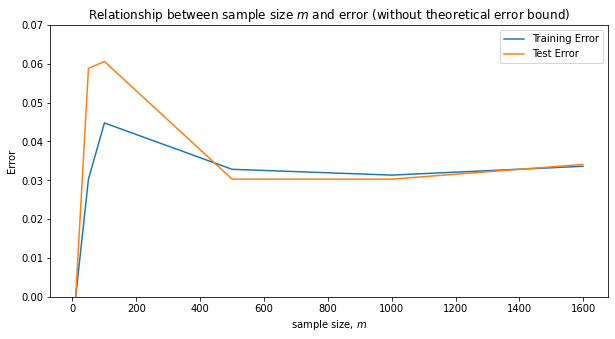

In [469]:
# Graph showing relationship error ~ gamma (gamma fixed, sample size varied)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.title('Relationship between sample size $m$ and error (without theoretical error bound)')
plt.xlabel('sample size, $m$')
plt.ylabel('Error')
plt.ylim((0, 0.07))
plt.plot(m_r,train_error_m_r, label = 'Training Error')
plt.plot(m_r,test_error_m_r, label = 'Test Error')
plt.legend()
plt.show()